In [16]:
import msprime
import numpy as np
import pandas as pd
import simulator
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [5]:
def dist_fun(N, t1, t2, l):
    c = -(l / 50 + 1 / N)
    output = (np.exp(c * t2) * (np.power(c * t2, 2) - 2 * c * t2 + 2) / np.power(c, 3)) - \
             (np.exp(c * t1) * (np.power(c * t1, 2) - 2 * c * t1 + 2) / np.power(c, 3))
    r = np.exp(t1 / N) / (2500 * N)
    return r * output

def dist_denom(N, t1, t2, u, v):
    c1 = -(v / 50 + 1 / N)
    c2 = -(u / 50 + 1 / N)
    k1 = (-1 / (50 * N)) * ((np.exp(c1 * t2) * (c1 * t2 - 1) / np.power(c1, 2)) - \
                            (np.exp(c1 * t1) * (c1 * t1 - 1) / np.power(c1, 2)))
    k2 = (1 / (50 * N)) * ((np.exp(c2 * t2) * (c2 * t2 - 1) / np.power(c2, 2)) - \
                           (np.exp(c2 * t1) * (c2 * t1 - 1) / np.power(c2, 2)))
    r = np.exp(t1 / N)
    return r * (k1 + k2)
    

In [24]:
N = [2500,2500,2500]
T = 100
m = 2
length = 5e6
n = 100
L = [0.35,2,200]

out = simulator.popn2_simple_data_morgan(N,T,L,m,length,n)


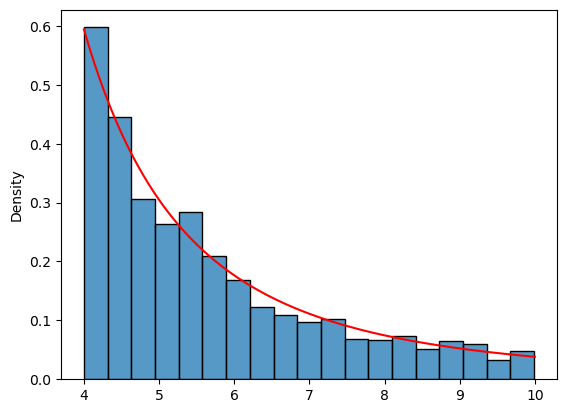

In [32]:
o1=[]
u=4
v=10
for i in range(out['N_obs']):
    if (out['group'][i] == 1)&(u<out['y'][i]<v):
        o1.append(out['y'][i])
sns.histplot(o1,stat='density')

x = np.arange(u,v+0.01,0.01)
xx = [(dist_fun(N[0]*2,0,T,a)+dist_fun(N[2]*2,T,100000000,a))/(dist_denom(N[0]*2,0,T,u,v) + dist_denom(N[2]*2,T,100000000,u,v)) for a in x]
plt.plot(x,xx,color = 'red')

In [34]:
from scipy.stats import kstest

In [ ]:
L = [0.35,2,200]
N_list = [500,1000,2000,3000]
T_list = [50,100,150,200,250,300]
for i in range(len(N_list)):
    for j in range(len(T_list)):
        N = N_list[i]
        T = T_list[j]
        data = 
